# Titanic Survival Prediction

Welcome to the Titanic Survival Prediction notebook! In this project, we aim to predict the survival outcome of passengers aboard the ill-fated RMS Titanic. By leveraging machine learning techniques, we'll analyze various features to make informed predictions about who survived the disaster.



### Notebook Structure

This notebook is organized into several sections, each serving a specific purpose:

- Import Necessary Libraries: We begin by importing the Python libraries and modules required for data manipulation, visualization, and modeling. These tools will help us conduct a comprehensive analysis and build predictive models.

- Loading the Training Dataset: Here, we load the training dataset, which contains valuable information about the passengers, including whether they survived or not. This data will serve as the foundation for our analysis and model training.

- Exploring Feature-Target Correlation: Before diving into modeling, we explore the correlation between various features and the target variable (survival). This step helps us identify which features are likely to be influential in predicting survival.

- Splitting the Dataset: The dataset is divided into training and testing subsets. The training data is used to train our machine learning models, while the testing data is reserved for evaluating their performance.

- Preprocessing the Train Data: This section focuses on data preprocessing, including handling missing values, dropping unnecessary columns ('PassengerId' and 'Ticket'), and feature engineering. We create and modify features to improve the predictive power of our models.

- Encoding and Standardization: To make the data suitable for machine learning algorithms, we encode categorical features and standardize numerical features. This ensures that all features have a consistent format.

- Training the Data: With the preprocessed data in hand, we train various machine learning models, such as Logistic Regression, Random Forest, SVM, and more. We evaluate their performance and choose the best-performing model for predictions.

- Preprocessing the Test Data: Similar to the training data, we preprocess the test dataset to prepare it for predictions.

- Making Predictions: Using our trained model, we make predictions on the test data to determine the survival outcome of passengers in the unseen dataset.

- Creating File to Submit on Kaggle: Finally, we format the predictions and create a submission file that can be uploaded to Kaggle to assess the model's performance on the competition leaderboard.

This notebook guides you through each step of the Titanic survival prediction project, from data exploration to model training and evaluation. We hope you find this analysis informative and engaging as we embark on this data science journey together.

Let's get started by importing the necessary libraries!

### Import Necessary Libraries

In this section of the code, we start by importing the essential libraries required for our Titanic challenge solution. These libraries serve as the foundation for various tasks such as data manipulation, visualization, and machine learning model building.

In [4]:
# Data Analysis and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Models and Utilities
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Data Preprocessing and Encoding
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Statistical Tests
from scipy.stats import chi2_contingency

# Pipeline and Column Transformation
from sklearn.pipeline import Pipeline

# Transformers and encoders
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


### Loading the Training Dataset

Let's load the training dataset from a CSV file into a Pandas DataFrame named train. This dataset contains essential information about Titanic passengers, serving as the foundation for our analysis and predictive modeling. The data is read from the specified file path using Pandas' pd.read_csv() function.

In [5]:
# Load Titanic dataset from a CSV file into a Pandas DataFrame
train = pd.read_csv('/Users/gabriel/Library/CloudStorage/OneDrive-Pessoal/Data_Science/Projetos/Titanic Survival Prediction /Titanic_ML_from_Disaster/train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This command provides a quick glimpse of the dataset's structure and its initial records. It helps in verifying data loading and gaining a preliminary understanding of the dataset's columns and values.

### Exploring Feature-Target Correlation

To gain insights into the relationship between our dataset's features and the target variable, we start by examining the column names within our training dataset using the command train.columns. This step helps us identify which features might play a significant role in predicting passenger survival in the Titanic dataset.

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Next, we will categorize the columns in our training dataset into three distinct groups, namely categorical_columns, numerical_columns, and the target_variable. This categorization is essential for data analysis and model building, as it helps us understand the nature of each column and its potential role in predicting passenger survival on the Titanic.

In [8]:
categorical_columns = ['Sex', 'Embarked']
numerical_columns = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
target_variable = 'Survived'

for column in categorical_columns:
    unique_values = train[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Sex: ['male' 'female']
Unique values in Embarked: ['S' 'C' 'Q' nan]


- Categorical Columns: These columns represent categorical or discrete attributes in our dataset. In this case, we have identified two categorical columns, namely 'Sex' and 'Embarked.' Categorical columns contain non-numeric values that often represent categories or labels. For each of these columns, we print the unique values they contain to gain insights into the categories present in the data.

- Numerical Columns: Numerical columns, on the other hand, consist of numeric data that can be used for mathematical operations. In our dataset, we have identified five numerical columns: 'Age,' 'Pclass' (passenger class), 'SibSp' (number of siblings or spouses aboard), 'Parch' (number of parents or children aboard), and 'Fare' (ticket fare). These columns will play a crucial role in our predictive modeling.

- Target Variable: The 'Survived' column is designated as the target variable. This is the variable we aim to predict in our machine learning model. It indicates whether a passenger survived (1) or did not survive (0) the Titanic disaster.

During our dataset exploration, we have made specific observations regarding certain columns. In particular:

- 'Ticket': Additionally, it's worth noting that upon initial analysis, we have determined that the 'Ticket' column may not provide substantial insights or relevance to our prediction task. Therefore, we have decided to exclude it from the current analysis.

- 'Name': Further, we acknowledge that the 'Name' column contains valuable information, such as passenger titles (e.g., Mr., Mrs., Dr.) that could potentially be relevant for further feature engineering. As a result, we plan to explore and process the 'Name' column in more detail in subsequent steps of our analysis.

- 'Cabin': We plan to utilize the 'Cabin' information to group passengers into cabin categories or decks (e.g., A, B, C, etc.). This categorization will allow us to explore potential patterns related to cabin locations and their impact on passenger survival. We consider the 'Cabin' column as a categorical feature for this purpose.

These decisions are driven by a deeper understanding of the dataset's context within the Titanic challenge and are aimed at optimizing the selection of features that will contribute most effectively to our predictive model.

#### Categorical Variable Analysis

In this section, we analyze the relationship between two categorical variables, 'Sex' and 'Embarked,' and the target variable 'Survived' in the Titanic dataset.

In [9]:
for column in categorical_columns:
    contingency_table = pd.crosstab(train[column], train['Survived'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{column} vs Survived: Chi-square = {chi2}, p-value = {p_value}")

Sex vs Survived: Chi-square = 260.71702016732104, p-value = 1.1973570627755645e-58
Embarked vs Survived: Chi-square = 26.48914983923762, p-value = 1.769922284120912e-06


- 'Sex' vs. 'Survived: A chi-square test reveals a highly significant association (Chi-square = 260.72, p-value ≈ 0) between gender ('Sex') and passenger survival, indicating that gender is strongly related to survival outcomes.

- 'Embarked' vs. 'Survived: Similarly, a chi-square test shows a statistically significant association (Chi-square = 26.49, p-value ≈ 0) between the port of embarkation ('Embarked') and passenger survival.

These analyses help us understand how these categorical variables may influence the likelihood of survival and guide feature selection for our predictive model.

#### Numerical Variable Analysis

Here, we perform a correlation analysis on key numerical variables ('Age,' 'Pclass,' 'SibSp,' 'Parch,' 'Fare') to assess their relationships with the target variable 'Survived.'



Age        -0.077221
Pclass     -0.338481
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64


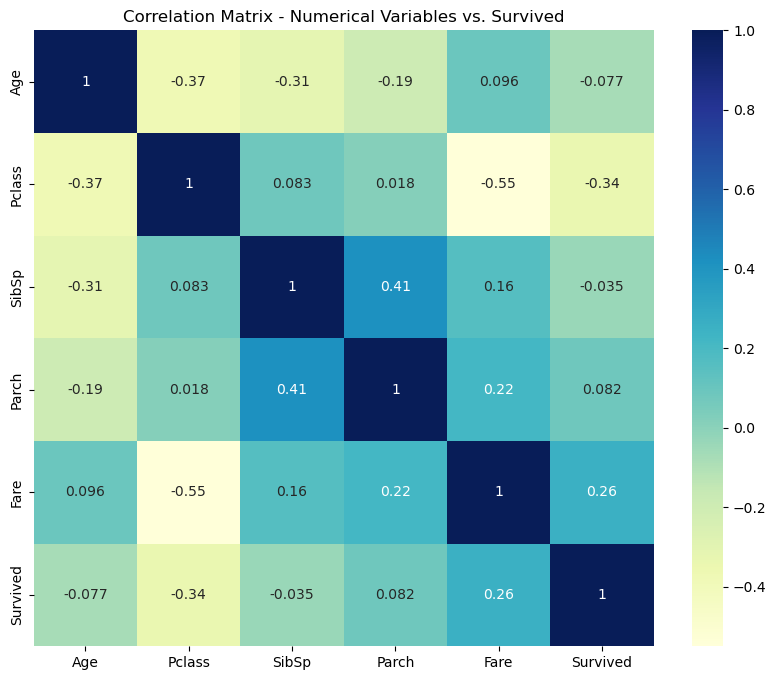

In [10]:
# Calculate correlation matrix
correlation_matrix = train[numerical_columns + [target_variable]].corr()

# Extract the correlation coefficients with the target variable
correlations = correlation_matrix[target_variable]
print(correlations)

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix - Numerical Variables vs. Survived")
plt.show()

The correlation analysis reveals important insights into the relationships between numerical variables and the target variable 'Survived' in the Titanic dataset:

Negative Correlations:

- 'Pclass' (Passenger Class) exhibits a significant negative correlation of approximately -0.34 with 'Survived.' This suggests that as the class number increases (e.g., from 1st class to 3rd class), the likelihood of survival decreases.
- 'Age' shows a slight negative correlation of approximately -0.08 with 'Survived.' This implies that older passengers may have a slightly lower chance of survival.

Positive Correlations:

- 'Fare' (Ticket Fare) demonstrates a noteworthy positive correlation of approximately 0.26 with 'Survived.' This indicates that passengers who paid higher fares tend to have a higher likelihood of survival.
- 'Parch' (Number of Parents/Children Aboard) displays a positive correlation of approximately 0.08 with 'Survived,' suggesting that passengers traveling with more family members rather than alone may have an increased chance of survival.

Weak Correlations:

- 'SibSp' (Number of Siblings/Spouses Aboard) shows a relatively weak negative correlation of approximately -0.04 with 'Survived.' This implies a modest impact on survival.

These correlation findings provide valuable insights into the relationships between numerical features and passenger survival. They inform our feature selection process and help us choose the most relevant variables for building predictive models in the Titanic dataset analysis.

### Spliting the Dataset

This section involves splitting our dataset into training and testing sets, a fundamental step in machine learning. We use scikit-learn's train_test_split function to create separate datasets for training and testing. The resulting datasets, X_train, X_test, y_train, and y_test, are used for model training and evaluation. These shapes indicate the size of each dataset, ensuring that we have the appropriate data for building and assessing our machine learning models.



In [11]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 11)
X_test shape: (179, 11)
y_train shape: (712,)
y_test shape: (179,)


X contains the input features (excluding 'Survived').
y contains the target variable ('Survived').
We use an 80-20 split ratio for training and testing data. The resulting data shapes are printed for verification:

X_train and y_train are the training data (80%).
X_test and y_test are the testing data (20%).

### Preprocessing the train data

In this comprehensive data preprocessing phase, we address missing values and perform feature engineering.



#### Understanding the Missing Values

Let's start by checking for missing values in both the training (X_train) and test (X_test) datasets using heatmap visualizations and numerical summaries.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
dtype: int64


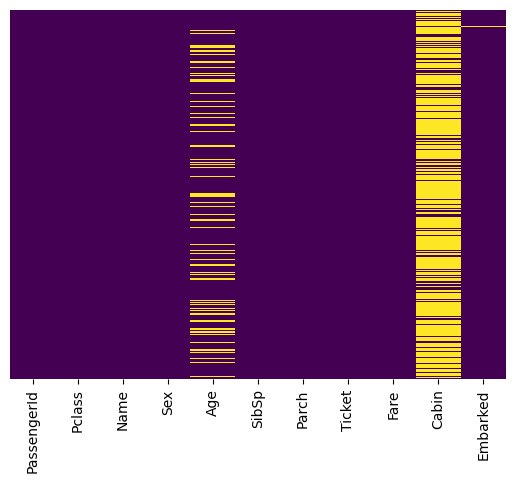

In [12]:
sns.heatmap(X_train.isna(), yticklabels=False, cbar=False, cmap='viridis')

print(X_train.isna().sum())

The output above provides valuable insights into the presence of missing values within our training dataset (X_train). Here's a breakdown of what we observe:

- 'Age' Column: There are 138 missing values in the 'Age' column. These missing age values will be addressed in the preprocessing step by calculating and filling them with mean values based on passenger class and gender.

- 'Cabin' Column: The 'Cabin' column has a significant number of missing values, with 541 out of 712 values being missing. Due to the extent of missing data in this column, we will make a decision on how to handle it as part of our preprocessing strategy.

- 'Embarked' Column: Only two instances of missing values are found in the 'Embarked' column. These missing 'Embarked' values will be conveniently filled with the most frequent value, 'S,' as it represents the port of embarkation for the majority of passengers.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             39
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          146
Embarked         0
dtype: int64

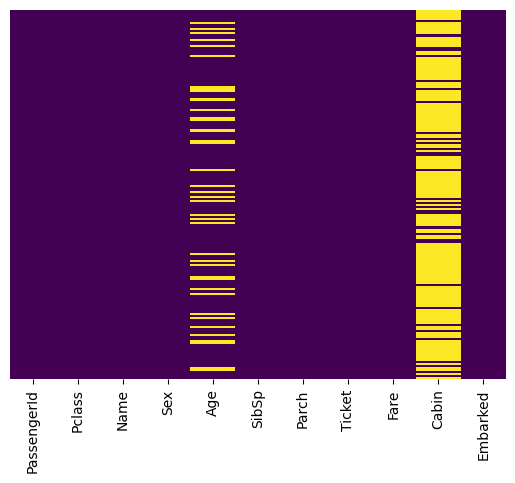

In [13]:
sns.heatmap(X_test.isna(), yticklabels=False, cbar=False, cmap='viridis')

X_test.isna().sum()

Now, the output above provides insights into the presence of missing values within our test dataset (X_test). Here's a summary of the observations:

'Age' Column: There are 39 missing values in the 'Age' column in the test dataset. Similar to the training dataset, these missing age values will be addressed during preprocessing by calculating and filling them with mean values based on passenger class and gender.

'Cabin' Column: The 'Cabin' column exhibits a significant number of missing values, with 146 out of 179 values being missing in the test dataset. Decisions on handling these missing values will be made as part of our preprocessing strategy, considering the extent of missing data.

Other Columns: For the remaining columns, including 'Embarked', there are no missing values, ensuring the completeness of these features in the test dataset.

##### Handling Missing 'Embarked'

In this section, we address missing values in the "Embarked" feature within the training dataset (X_train). Since there are only three instances of missing values (NaN) in this column, we choose a straightforward approach to handle them.

First, let's examine the distribution of values within the "Embarked" feature to determine the most frequent embarkation port:

In [14]:
X_train.Embarked.value_counts()

S    515
C    130
Q     65
Name: Embarked, dtype: int64

Here, we observe that "S" (Southampton) is the most frequently occurring embarkation port. 

To maintain data completeness, we proceed to fill the three missing "Embarked" values with the most frequent value, which is "S." This ensures that the dataset remains consistent and ready for analysis and modeling.

In [15]:
# Fill missing 'Embarked' values with 'S' in X_train and X_test
X_train['Embarked'] = X_train['Embarked'].fillna('S')
X_test['Embarked'] = X_test['Embarked'].fillna('S')

##### Handling Missing 'Age'

In this section, we address missing values in the "Age" feature within both the training and test datasets (X_train and X_test). The strategy involves calculating the mean age based on passenger class and gender, enabling us to estimate missing age values more accurately by considering patterns within each group.

First, we calculate the mean age for passengers, categorized by passenger class ('Pclass') and gender ('Sex'). This step is crucial for understanding age patterns within different groups. With the calculated means in place, we proceed to fill in missing age values in both the training and test datasets. This ensures that the age distribution is more accurately represented, improving data completeness:

In [16]:
# Calculate the mean age by Pclass and Sex in the training data
mean_age_by_pclass_sex_xtrain = X_train.groupby(['Pclass', 'Sex'])['Age'].mean()
mean_age_by_pclass_sex_xtest = X_test.groupby(['Pclass', 'Sex'])['Age'].mean()

# Fill missing Age values in X_train and X_test
X_train['Age'] = X_train.apply(lambda row: mean_age_by_pclass_sex_xtrain[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)
X_test['Age'] = X_test.apply(lambda row: mean_age_by_pclass_sex_xtest[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)

By executing these steps, we effectively handle missing "Age" values while considering passenger class and gender, ensuring a more comprehensive and representative dataset for further analysis and modeling.

#### Droping 'PassengerId' and 'Ticket'

In this section, we streamline our datasets by removing the 'PassengerId' and 'Ticket' columns from both the training and test datasets (X_train and X_test). This decision is based on the understanding that these columns are unlikely to provide significant insights or aid in our analysis or modeling efforts.

We proceed to drop these columns using the following code:

In [17]:
# Drop 'PassengerId' and 'Ticket' columns in X_train and X_test
X_train = X_train.drop(columns=['PassengerId', 'Ticket'])
X_test = X_test.drop(columns=['PassengerId', 'Ticket'])


By executing these steps, we simplify our datasets, focusing on the most relevant features for our analysis and modeling tasks. This enhances the clarity and efficiency of our data preparation process.






It's worth noting that the 'Cabin' column contains a significant number of missing values, with 541 out of 712 values missing in the training dataset. These missing values will be addressed in the upcoming feature engineering section, where we plan to create a new feature called 'Deck' based on the available cabin information. This feature will categorize passengers into specific cabin categories or decks, such as 'A,' 'B,' 'C,' and so on. By utilizing the available cabin data, we aim to extract valuable information and insights that can potentially contribute to our analysis and improve the predictive performance of our models. This approach ensures that we make the most of the existing data, even in the presence of missing 'Cabin' values, to enhance our understanding of passenger demographics and their relationship with survival outcomes in the Titanic challenge.

#### Feature Engineering

##### Creating 'Deck' Feature  

As mentioned above, in this feature engineering section, we introduce a new feature called 'Deck' by utilizing the 'Cabin' information within both the training and test datasets (X_train and X_test). The 'Cabin' column initially had a significant number of missing values, as shown in the output below:

In [18]:
print(X_train.isna().sum())
print(X_train['Cabin'].describe())
print(X_train['Cabin'].unique())

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       541
Embarked      0
dtype: int64
count     171
unique    130
top        G6
freq        4
Name: Cabin, dtype: object
['B58 B60' 'B18' nan 'C68' 'A10' 'E10' 'B20' 'B94' 'B28' 'B51 B53 B55'
 'F2' 'A31' 'B57 B59 B63 B66' 'C90' 'C23 C25 C27' 'C126' 'A26' 'B5'
 'B96 B98' 'E38' 'B78' 'C106' 'B77' 'B80' 'F G73' 'C123' 'T' 'C47' 'C86'
 'C85' 'E25' 'A6' 'B35' 'E34' 'A34' 'D46' 'A20' 'F4' 'D19' 'A5' 'C65'
 'C78' 'F38' 'E44' 'C101' 'B4' 'D20' 'C103' 'D50' 'D36' 'C30' 'C22 C26'
 'E8' 'B102' 'E33' 'E67' 'C50' 'C148' 'E36' 'B82 B84' 'D35' 'B50' 'C49'
 'C52' 'C45' 'C124' 'B69' 'B71' 'D26' 'A24' 'D56' 'D7' 'D17' 'A36' 'B73'
 'C118' 'B22' 'B86' 'C2' 'C110' 'C46' 'E12' 'B19' 'G6' 'D48' 'D30' 'E46'
 'D10 D12' 'C128' 'F33' 'A23' 'C54' 'D45' 'C83' 'C32' 'C111' 'C70' 'E58'
 'C7' 'E101' 'B49' 'C87' 'D' 'A7' 'E24' 'C99' 'B30' 'B39' 'A14' 'B42'
 'E63' 'D15' 'D33' 'C125' 'E121' 'C93' 'C92' 

While there are numerous unique values within the 'Cabin' column, we've devised a strategy to extract valuable information and categorize passengers into specific decks, such as 'A-B-C,' 'D-E,' 'F,' and 'Unknown.' The code snippet below demonstrates this feature engineering process:



In [19]:
def modify_deck_features(dataset):
    # Define the deck mapping
    deck_mapping = {"A": "A-B-C", "B": "A-B-C", "C": "A-B-C", "D": "D-E", "E": "D-E", "F": "F", "G": "Unknown", "Unknown": "Unknown"}

    # Fill missing values and extract deck information
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].str.extract(r"([a-zA-Z]+)", expand=False)
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)
    dataset['Deck'] = dataset['Deck'].fillna("Unknown")

    # Drop the 'Cabin' feature
    dataset = dataset.drop(['Cabin'], axis=1)

    dataset['Deck'] = dataset['Deck'].replace('G', 'Unknown')

    return dataset

# Apply the modification function to X_train and X_test
X_train = modify_deck_features(X_train)
X_test = modify_deck_features(X_test)


By creating the 'Deck' feature, we aim to capture valuable insights from the 'Cabin' data while accommodating the presence of missing values, enhancing our dataset for analysis and modeling in the Titanic challenge.

After that, we can observe the unique values present in this new feature for both the training and test datasets.





In [20]:
print(X_train.Deck.unique())
print(X_test.Deck.unique())


['A-B-C' 'Unknown' 'D-E' 'F']
['Unknown' 'A-B-C' 'D-E' 'F']


These unique values reflect the categorization of passengers into specific decks, such as 'A-B-C,' 'D-E,' 'F,' and 'Unknown,' based on the available 'Cabin' information. This feature transformation allows us to capture and utilize valuable insights from the 'Cabin' data while enhancing the dataset's readiness for analysis and machine learning modeling in the Titanic challenge.






To gain a deeper understanding of the distribution of passenger classes ('Pclass') across different decks ('Deck'), we conducted an analysis. The output provided reveals the percentage distribution of each 'Pclass' within its corresponding 'Deck' category in the training dataset (X_train).

In [21]:
X_train.groupby('Deck')['Pclass'].value_counts(normalize=True)

Deck     Pclass
A-B-C    1         1.000000
D-E      1         0.826923
         2         0.134615
         3         0.038462
F        2         0.636364
         3         0.363636
Unknown  3         0.706960
         2         0.243590
         1         0.049451
Name: Pclass, dtype: float64

The bar chart visualization provided below further illustrates the distribution of passenger classes ('Pclass') within each 'Deck' category, allowing for a clear and visual representation of these insights. The color coding distinguishes each 'Pclass,' making it easier to interpret and analyze the distribution patterns.

In [22]:
import plotly.graph_objects as go

# Calculate the percentage of each Pclass in each deck
deck_pclass_percentages = X_train.groupby(['Deck', 'Pclass']).size() / X_train.groupby('Deck').size() * 100
deck_pclass_percentages = deck_pclass_percentages.reset_index(name='Percentage')

# Remove the 'Unknown' category
# deck_pclass_percentages = deck_pclass_percentages[deck_pclass_percentages['Deck'] != 'Unknown']

# Define the color mapping for each Pclass
color_mapping = {1: 'rgba(0, 128, 0, 0.7)', 2: 'rgba(0, 0, 255, 0.7)', 3: 'rgba(255, 165, 0, 0.7)'}

# Create an empty list to store the traces
traces = []

# Create a trace for each Pclass
for pclass in [1, 2, 3]:
    pclass_data = deck_pclass_percentages[deck_pclass_percentages['Pclass'] == pclass]
    trace = go.Bar(x=pclass_data['Deck'],
                   y=pclass_data['Percentage'],
                   name=f'Pclass {pclass}',
                   marker_color=color_mapping[pclass])
    traces.append(trace)

# Create the layout for the plot
layout = go.Layout(title='Pclass Distribution by Deck',
                   xaxis_title='Deck',
                   yaxis_title='Percentage',
                   barmode='stack')

# Create the figure with the traces and layout
fig = go.Figure(data=traces, layout=layout)

# Add a legend
fig.update_layout(showlegend=True)

# Show the plot
fig.show()


Deck 'A-B-C': This deck is exclusively comprised of passengers from 'Pclass 1,' accounting for 100% of the passengers in this category.

Deck 'D-E': Within this deck, 'Pclass 1' dominates with approximately 82.69% of passengers. 'Pclass 2' and 'Pclass 3' make up 13.46% and 3.85%, respectively.

Deck 'F': In this deck, 'Pclass 2' represents the majority of passengers, with approximately 63.64%. 'Pclass 3' follows with around 36.36%.

Deck 'Unknown': The 'Unknown' deck exhibits a diverse distribution of passenger classes. Approximately 70.70% of passengers belong to 'Pclass 3,' followed by 'Pclass 2' at 24.36%, and 'Pclass 1' at 4.95%.

In [23]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,247.5208,C,A-B-C
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.000000,0,1,57.9792,C,A-B-C
564,3,"Meanwell, Miss. (Marion Ogden)",female,20.837349,0,0,8.0500,S,Unknown
175,3,"Klasen, Mr. Klas Albin",male,18.000000,1,1,7.8542,S,Unknown
883,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,10.5000,S,Unknown


##### Creating 'Title' Feature

In this section, we create the 'Title' feature by extracting titles from passenger names ('Name') in the dataset. We map specific titles to standardized values, handling less common titles, and filling missing titles based on gender-specific defaults. This 'Title' feature provides valuable insights into passenger demographics.






In [24]:
def modify_title_feature(dataset):
    title_mapping = {
        'Mr': 'Mr',
        'Miss': 'Miss',
        'Mrs': 'Mrs',
        'Master': 'Master',
        'Aristocrats/Military/Honorifics': 'Aristocrats/Military/Honorifics'
    }
    
    title_mapping_updated = {
        'Mlle': 'Miss',
        'Ms': 'Miss',
        'Mme': 'Mrs'
    }
    
    uncommon_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    
    # Extract titles from the 'Name' column
    dataset['Title'] = dataset['Name'].str.extract(' ([a-zA-Z]+)\.', expand=False)
    
    # Replace less common titles with 'Aristocrats/Military/Honorifics'
    dataset.loc[~dataset['Title'].isin(title_mapping.keys()), 'Title'] = 'Aristocrats/Military/Honorifics'
    
    # Map specific titles to their corresponding values
    dataset['Title'] = dataset['Title'].replace(title_mapping_updated)
    
    # Map titles to their corresponding strings using the 'title_mapping' dictionary
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
    # Fill missing titles with 'Mr' for males and 'Miss' for females
    dataset.loc[(dataset['Sex'] == 'male') & dataset['Title'].isna(), 'Title'] = 'Mr'
    dataset.loc[(dataset['Sex'] == 'female') & dataset['Title'].isna(), 'Title'] = 'Miss'
    
    return dataset


# Apply the modification function to X_train and X_test
X_train = modify_title_feature(X_train)
X_test = modify_title_feature(X_test)

# # Calculate the mean age by 'Pclass', 'Sex', and 'Title' in the training data
# mean_age_by_pclass_sex_title_xtrain = X_train.groupby(['Pclass', 'Sex', 'Title'])['Age'].mean()
# mean_age_by_pclass_sex_title_xtest = X_test.groupby(['Pclass', 'Sex', 'Title'])['Age'].mean()

# # Fill missing Age values in X_train and X_test
# X_train['Age'] = X_train.apply(lambda row: mean_age_by_pclass_sex_title_xtrain[row['Pclass'], row['Sex'], row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)
# X_test['Age'] = X_test.apply(lambda row: mean_age_by_pclass_sex_title_xtest[row['Pclass'], row['Sex'], row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

# Drop the 'Name' column from both datasets
X_train = X_train.drop(['Name'], axis=1)
X_test = X_test.drop(['Name'], axis=1)


This section focuses on generating the 'Title' feature by extracting titles from passengers' names ('Name') in the dataset. We establish a mapping scheme to standardize specific titles, including 'Mr,' 'Miss,' 'Mrs,' 'Master,' and 'Aristocrats/Military/Honorifics.' Additionally, less common titles, such as 'Lady,' 'Countess,' 'Capt,' 'Col,' 'Don,' 'Dr,' 'Major,' 'Rev,' 'Sir,' 'Jonkheer,' and 'Dona,' are grouped under 'Aristocrats/Military/Honorifics' to simplify and streamline the feature.

The code then employs regular expressions to extract titles from the 'Name' column and updates the 'Title' feature accordingly. Subsequently, the 'Title' values are mapped to their standardized counterparts, ensuring consistency and meaningfulness in the representation of passenger titles.

For any missing titles, gender-specific defaults are applied: 'Mr' for males and 'Miss' for females. This meticulous approach enhances the dataset's informativeness and prepares it for subsequent analysis.

Finally, the 'Name' column is dropped from both datasets to eliminate redundancy and reduce dimensionality, focusing on pertinent features for analysis and modeling.

In [25]:
X_train['Title'].value_counts()

Mr                                 412
Miss                               150
Mrs                                 96
Master                              32
Aristocrats/Military/Honorifics     22
Name: Title, dtype: int64

Above we can find the distribution of titles among passengers in the training dataset. It presents the count of each unique title found in the 'Title' feature.

In [26]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
299,1,female,50.000000,0,1,247.5208,C,A-B-C,Mrs
523,1,female,44.000000,0,1,57.9792,C,A-B-C,Mrs
564,3,female,20.837349,0,0,8.0500,S,Unknown,Miss
175,3,male,18.000000,1,1,7.8542,S,Unknown,Mr
883,2,male,28.000000,0,0,10.5000,S,Unknown,Mr


This is how our train data set looks so far. Let us keep going.

##### Creating the 'Family_Size' feature

We will created the 'Family_Size' feature to capture information about the size of each passenger's family onboard. This feature is calculated by adding the number of siblings/spouses ('SibSp') and parents/children ('Parch') each passenger had, plus one to include the passenger themselves.

To make the feature more manageable and informative, we further categorized family sizes into four groups: 'Alone,' 'Small,' 'Medium,' and 'Large.' Passengers traveling alone are labeled 'Alone,' while those with family sizes of 2 to 3 are labeled 'Small,' family sizes of 4 to 5 are labeled 'Medium,' and family sizes of 6 or more are labeled 'Large.'



In [27]:
def modify_family_features(dataset):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    # Categorize family size
    dataset['FamilySizeCategory'] = 'Alone'
    dataset.loc[(dataset['FamilySize'] >= 2) & (dataset['FamilySize'] <= 3), 'FamilySizeCategory'] = 'Small'
    dataset.loc[(dataset['FamilySize'] >= 4) & (dataset['FamilySize'] <= 5), 'FamilySizeCategory'] = 'Medium'
    dataset.loc[dataset['FamilySize'] >= 6, 'FamilySizeCategory'] = 'Large'
    
    return dataset

# Apply the modification function to X_train and X_test
X_train = modify_family_features(X_train)
X_test = modify_family_features(X_test)


In [28]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,FamilySizeCategory
299,1,female,50.000000,0,1,247.5208,C,A-B-C,Mrs,2,Small
523,1,female,44.000000,0,1,57.9792,C,A-B-C,Mrs,2,Small
564,3,female,20.837349,0,0,8.0500,S,Unknown,Miss,1,Alone
175,3,male,18.000000,1,1,7.8542,S,Unknown,Mr,3,Small
883,2,male,28.000000,0,0,10.5000,S,Unknown,Mr,1,Alone


This feature engineering helps us understand the dynamics of family sizes among passengers and can potentially reveal insights about survival rates based on family size.

##### Create 'AgeGroup'

To create this feature, we first convert the 'Age' column to integers and then use predefined age bins to categorize passengers. These bins cover various age ranges, from infants to elderly passengers. By categorizing passengers by age group, we can analyze survival rates and patterns among different age demographics, which may offer valuable insights into the Titanic's tragic events.






In [29]:
def modify_age_features(dataset):
    age_groups = {
        0: 'Infant',
        1: 'Children',
        2: 'Adolescence',
        3: 'Early Adulthood',
        4: 'Adulthood',
        5: 'Elderly'
    }

    dataset['Age'] = dataset['Age'].astype(int)
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[-1, 1, 11, 17, 30, 64, 150], labels=False)
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_groups)

    return dataset

# Apply the modification function to X_train and X_test
X_train = modify_age_features(X_train)
X_test = modify_age_features(X_test)


In [30]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,FamilySizeCategory,AgeGroup
299,1,female,50,0,1,247.5208,C,A-B-C,Mrs,2,Small,Adulthood
523,1,female,44,0,1,57.9792,C,A-B-C,Mrs,2,Small,Adulthood
564,3,female,20,0,0,8.0500,S,Unknown,Miss,1,Alone,Early Adulthood
175,3,male,18,1,1,7.8542,S,Unknown,Mr,3,Small,Early Adulthood
883,2,male,28,0,0,10.5000,S,Unknown,Mr,1,Alone,Early Adulthood


##### Creating FarePerPerson and LogFarePerPerson

Next, we will create two new features, 'FarePerPerson' and 'LogFarePerPerson,' to better understand the distribution of fares among passengers. These features are designed to capture the fare amount per person, providing insights into how passengers paid for their tickets relative to their family size. The 'FarePerPerson' feature calculates the fare per person by dividing the fare amount by the family size. Meanwhile, the 'LogFarePerPerson' feature applies a logarithmic transformation to 'FarePerPerson,' which can help normalize the data distribution and reduce the impact of extreme fare values.

Additionally, we've introduced the 'FareBin' feature, which categorizes fares into bins within each passenger class ('Pclass'). This step allows us to analyze fare patterns more effectively, considering the variations in ticket prices across different classes. These new features will enhance our ability to explore and model the data, potentially revealing relationships between fare payments and passenger characteristics.



In [31]:
def create_fare_features(dataset):
    dataset['Fare'] = dataset['Fare'].astype('int64')  # Convert Fare to int64
    dataset['FarePerPerson'] = dataset['Fare'] / dataset['FamilySize']
    dataset['LogFarePerPerson'] = np.log1p(dataset['FarePerPerson'])

    return dataset

# Apply the function to X_train and X_test
X_train = create_fare_features(X_train)
X_test = create_fare_features(X_test)


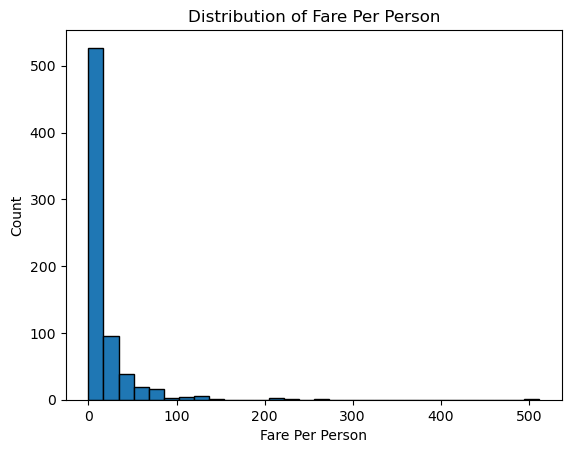

In [32]:
fare_per_person = X_train['FarePerPerson']

# Create a histogram to visualize the distribution
plt.hist(fare_per_person, bins=30, edgecolor='k')
plt.xlabel('Fare Per Person')
plt.ylabel('Count')
plt.title('Distribution of Fare Per Person')
plt.show()


The histogram above illustrates the distribution of fares per person ('Fare Per Person') among passengers. This visualization provides insights into the spread and concentration of fare values within the dataset. The majority of passengers appear to have lower fare values, while a smaller number of passengers have higher fares per person. Understanding this distribution is valuable for assessing the diversity of fare payments and their potential impact on other variables, including survival outcomes.






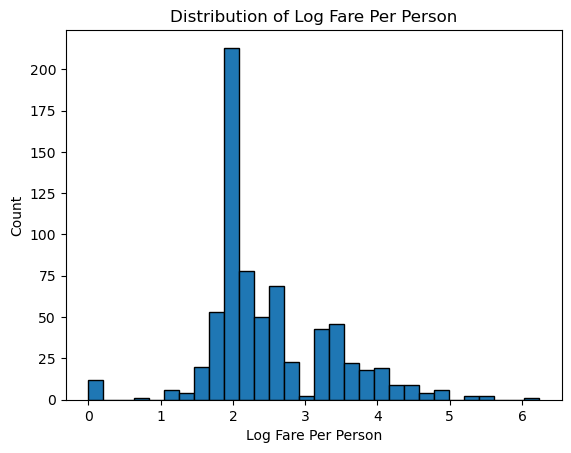

In [33]:
plt.hist(X_train['LogFarePerPerson'], bins=30, edgecolor='k')
plt.xlabel('Log Fare Per Person')
plt.ylabel('Count')
plt.title('Distribution of Log Fare Per Person')
plt.show()


The histogram displayed here showcases the distribution of the logarithm of the fare per person ('Log Fare Per Person') among passengers. Using the logarithm helps in transforming the fare values to make the distribution more visually interpretable and suitable for certain modeling techniques. In this transformed representation, the distribution appears to be closer to a normal distribution, which can be advantageous for modeling and analysis purposes. It helps to mitigate the impact of extreme values and provides a clearer view of the central tendency of fare per person values in the dataset.






In [34]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,FamilySizeCategory,AgeGroup,FarePerPerson,LogFarePerPerson
299,1,female,50,0,1,247,C,A-B-C,Mrs,2,Small,Adulthood,123.500000,4.824306
523,1,female,44,0,1,57,C,A-B-C,Mrs,2,Small,Adulthood,28.500000,3.384390
564,3,female,20,0,0,8,S,Unknown,Miss,1,Alone,Early Adulthood,8.000000,2.197225
175,3,male,18,1,1,7,S,Unknown,Mr,3,Small,Early Adulthood,2.333333,1.203973
883,2,male,28,0,0,10,S,Unknown,Mr,1,Alone,Early Adulthood,10.000000,2.397895


##### Age*PClass

The 'Age * Pclass' feature is created by multiplying the passenger's age by their passenger class (Pclass). This feature aims to capture a combination of age and socioeconomic status, as represented by the passenger class. It can provide valuable insights into how age and class interact in terms of survival prediction. By multiplying these two variables, we create a new feature that potentially identifies patterns related to age and class that might not be as apparent when examining them individually. This feature can be particularly useful for certain machine learning algorithms that can leverage such interactions for improved predictive performance.






In [35]:
def create_age_pclass_feature(dataset):
    dataset['AgePclass'] = dataset['Age'] * dataset['Pclass']
    return dataset

# Apply the modification function to X_train and X_test
X_train = create_age_pclass_feature(X_train)
X_test = create_age_pclass_feature(X_test)

In [36]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,FamilySizeCategory,AgeGroup,FarePerPerson,LogFarePerPerson,AgePclass
299,1,female,50,0,1,247,C,A-B-C,Mrs,2,Small,Adulthood,123.500000,4.824306,50
523,1,female,44,0,1,57,C,A-B-C,Mrs,2,Small,Adulthood,28.500000,3.384390,44
564,3,female,20,0,0,8,S,Unknown,Miss,1,Alone,Early Adulthood,8.000000,2.197225,60
175,3,male,18,1,1,7,S,Unknown,Mr,3,Small,Early Adulthood,2.333333,1.203973,54
883,2,male,28,0,0,10,S,Unknown,Mr,1,Alone,Early Adulthood,10.000000,2.397895,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,female,21,0,0,77,S,D-E,Miss,1,Alone,Early Adulthood,77.000000,4.356709,21
799,3,female,30,1,1,24,S,Unknown,Mrs,3,Small,Early Adulthood,8.000000,2.197225,90
575,3,male,19,0,0,14,S,Unknown,Mr,1,Alone,Early Adulthood,14.000000,2.708050,57
390,1,male,36,1,2,120,S,A-B-C,Mr,4,Medium,Adulthood,30.000000,3.433987,36


### Encoding and Standardization

In this section, we perform encoding and standardization of the dataset's features to prepare them for machine learning models. The dataset columns include both categorical and numerical features, and the encoding and standardization steps are as follows:



In [37]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'Title', 'FamilySize', 'FamilySizeCategory', 'AgeGroup',
       'FarePerPerson', 'LogFarePerPerson', 'AgePclass'],
      dtype='object')

- Categorical Features: The categorical features in the dataset are 'Sex', 'Embarked', 'Title', 'Deck', 'FamilySizeCategory', and 'AgeGroup'. These categorical features need to be one-hot encoded to convert them into a numerical format that can be used by machine learning models. One-hot encoding creates binary columns for each category within a feature.

- Numerical Features: The numerical features in the dataset include 'Age', 'FamilySize', 'Pclass', and 'AgePclass'.' These features are standardized using StandardScaler. Standardization scales the numerical features to have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.

- LogFarePerPerson Feature: The 'LogFarePerPerson' feature is a numerical feature that represents the logarithm of the 'FarePerPerson' feature. This feature is kept as is and not standardized because it's already on a logarithmic scale.



In [38]:
# Categorical features
categorical_features = ['Sex', 'Embarked', 'Title', 'Deck', 'FamilySizeCategory', 'AgeGroup']

# Numerical features
numerical_features = ['Age', 'FamilySize', 'Pclass', 'AgePclass']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features),
        ('logfare', 'passthrough', ['LogFarePerPerson'])
    ])

# Apply the column transformer to X_train
X_train_encoded = preprocessor.fit_transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())

# Apply the same column transformer to X_test
X_test_encoded = preprocessor.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out())


The ColumnTransformer is used to apply these transformations to the respective feature groups. After encoding and standardization, the transformed features are stored in new DataFrames, X_train_encoded and X_test_encoded, which are ready to be used for model training and testing. This preprocessing step ensures that the data is in a suitable format for various machine learning algorithms.

Please note that 'SibSp' and 'Parch' will not be included in the final feature set for modeling. This decision is made because the information contained in these two features is already adequately represented by the 'FamilySize' in numerical features and 'FamilySizeCategory' in categorical features. Keeping the original 'SibSp' and 'Parch' features could lead to multicollinearity, as their information is essentially captured by the more descriptive 'FamilySize' and 'FamilySizeCategory' features. 

- 'FamilySize' and 'FamilySizeCategory' are both retained because they provide complementary information about family size, with 'FamilySize' being the numerical representation and 'FamilySizeCategory' offering a categorical grouping.

Further, some other features are also retained because they offer unique and non-redundant information, either in the form of numerical precision ('Age,' 'Pclass,' 'AgePclass') or categorical grouping ('AgeGroup'). This allows for a richer representation of the data while avoiding multicollinearity issues.

- 'Age' and 'AgeGroup' are retained because they capture different aspects of age-related information. 'Age' represents the exact age of passengers, while 'AgeGroup' categorizes passengers into age groups for a more generalized view.

- 'Pclass' is retained as it represents the passenger class, an important feature for analysis.

- 'AgePclass' is retained as it represents the interaction between 'Age' and 'Pclass,' providing additional information that may be relevant for modeling.




### Training the data

Next, let's define a function named evaluate_model that helps assess the performance of a machine learning model:


In [39]:
def evaluate_model(model, X_train_encoded, y_train, X_test_encoded, y_test):
    # Train the model
    model.fit(X_train_encoded, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_encoded)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    # Calculate precision
    precision = precision_score(y_test, predictions)

    # Calculate recall
    recall = recall_score(y_test, predictions)

    # Calculate F1-score
    f1 = f1_score(y_test, predictions)

    # Print accuracy
    print("Accuracy:", accuracy)

    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=10, scoring='accuracy')

    # Print the cross-validation scores
    print('>>>>>>>>>>>>>')
    print("Mean CV Accuracy:", cv_scores.mean())
    print('Standard Deviation:', cv_scores.std())

    # Print other metrics
    print('>>>>>>>>>>>>>')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

Training the Model: The function starts by training the specified machine learning model using the provided encoded training data (X_train_encoded) and the corresponding training labels (y_train).

Making Predictions: Once the model is trained, it uses it to make predictions on a separate dataset, which is the encoded test data (X_test_encoded).

Calculating Metrics:

- Accuracy: It calculates the accuracy of the model's predictions by comparing them to the actual test labels (y_test). Accuracy tells us how often the model's predictions match the true outcomes.
- Precision: Precision is a measure of the model's ability to correctly identify positive cases (e.g., survivors in a Titanic dataset) among all cases it predicts as positive. It's the ratio of true positives to all predicted positives.
- Recall: Recall is a measure of the model's ability to find all positive cases. It's the ratio of true positives to all actual positives.
- F1-Score: The F1-score is a combined metric that balances precision and recall. It's useful when there's an imbalance between positive and negative cases.
Cross-Validation: The code also performs k-fold cross-validation (k=10) on the training data. Cross-validation helps assess how well the model generalizes to unseen data and provides a mean accuracy score along with its standard deviation.

Printing Metrics: The function prints out these performance metrics, making it easy to evaluate how well the model is performing. These metrics are essential for understanding the strengths and weaknesses of the machine learning model.

In summary, the evaluate_model function trains a model, evaluates its performance on a test dataset, and reports key metrics, including accuracy, precision, recall, and F1-score. It also provides insights into the model's consistency through cross-validation. This helps you make informed decisions about the model's suitability for your specific task.

Next, we will assess the performance of several models calling the 'evaluated_model' function!




#### SVM

In [40]:
# Initialize the SVM model
svm_model = SVC(random_state=420)

# Call the evaluate_model function
evaluate_model(svm_model, X_train_encoded, y_train, X_test_encoded, y_test)


Accuracy: 0.8435754189944135
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8273474178403756
Standard Deviation: 0.049078579201668096
>>>>>>>>>>>>>
Precision: 0.8833333333333333
Recall: 0.7162162162162162
F1-score: 0.791044776119403


#### LogisticRegression

In [41]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=420)

# Call the evaluate_model function
evaluate_model(logreg_model, X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy: 0.8324022346368715
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8160993740219092
Standard Deviation: 0.04897150735504339
>>>>>>>>>>>>>
Precision: 0.8235294117647058
Recall: 0.7567567567567568
F1-score: 0.7887323943661971


#### XGBoost Classifier

In [42]:
# Initialize the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=420)

# Call the evaluate_model function
evaluate_model(xgb_model, X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy: 0.7932960893854749
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8216353677621283
Standard Deviation: 0.04767064691470437
>>>>>>>>>>>>>
Precision: 0.8135593220338984
Recall: 0.6486486486486487
F1-score: 0.7218045112781954


#### RandomForest

In [43]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=420)

# Call the evaluate_model function
evaluate_model(rf_model, X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy: 0.8268156424581006
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8103286384976526
Standard Deviation: 0.044326590115694633
>>>>>>>>>>>>>
Precision: 0.8524590163934426
Recall: 0.7027027027027027
F1-score: 0.7703703703703704


#### KNN

In [44]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Call the evaluate_model function
evaluate_model(knn_model, X_train_encoded, y_train, X_test_encoded, y_test)


Accuracy: 0.8044692737430168
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8089788732394366
Standard Deviation: 0.04550998635982705
>>>>>>>>>>>>>
Precision: 0.8095238095238095
Recall: 0.6891891891891891
F1-score: 0.7445255474452555


#### DecisionTree

In [45]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=420)

# Call the evaluate_model function
evaluate_model(dt_model, X_train_encoded, y_train, X_test_encoded, y_test)


Accuracy: 0.7877094972067039
>>>>>>>>>>>>>
Mean CV Accuracy: 0.7724569640062598
Standard Deviation: 0.033732397996318116
>>>>>>>>>>>>>
Precision: 0.8103448275862069
Recall: 0.6351351351351351
F1-score: 0.712121212121212


#### Gaussian Nayve Bayes

In [46]:
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Call the evaluate_model function
evaluate_model(gnb_model, X_train_encoded, y_train, X_test_encoded, y_test)



Accuracy: 0.8715083798882681
>>>>>>>>>>>>>
Mean CV Accuracy: 0.7794796557120501
Standard Deviation: 0.06759574179662704
>>>>>>>>>>>>>
Precision: 0.8311688311688312
Recall: 0.8648648648648649
F1-score: 0.847682119205298


#### Perceptron

In [47]:
# Initialize the Perceptron model
perceptron_model = Perceptron(random_state=420)

# Call the evaluate_model function
evaluate_model(perceptron_model, X_train_encoded, y_train, X_test_encoded, y_test)


Accuracy: 0.770949720670391
>>>>>>>>>>>>>
Mean CV Accuracy: 0.7189162754303599
Standard Deviation: 0.09361960487199295
>>>>>>>>>>>>>
Precision: 0.6633663366336634
Recall: 0.9054054054054054
F1-score: 0.7657142857142858


#### Gradient Descent

In [48]:
# Initialize the Stochastic Gradient Descent model
sgd_model = SGDClassifier(random_state=420)

# Call the evaluate_model function
evaluate_model(sgd_model, X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy: 0.8379888268156425
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8021322378716744
Standard Deviation: 0.059815108657870715
>>>>>>>>>>>>>
Precision: 0.8688524590163934
Recall: 0.7162162162162162
F1-score: 0.7851851851851852


#### Analyzing the best score

 The following code evaluates the machine learning models, stores their performance metrics, and ranks them based on accuracy and mean cross-validation accuracy to identify the most suitable model for the task.

In [49]:
# Define the models and their corresponding names
models = [logreg_model, rf_model, xgb_model, svm_model, knn_model, dt_model, gnb_model, perceptron_model, sgd_model]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'Decision Tree', 'Naive Bayes', 'Perceptron', 'Gradient Descent']

# Create empty DataFrames for accuracy and mean CV accuracy ranking
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])
mean_cv_accuracy_df = pd.DataFrame(columns=['Model', 'Mean CV Accuracy', 'Standard Deviation'])

# Iterate over the models
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_train_encoded, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_encoded)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=10, scoring='accuracy')

    # Calculate the mean CV accuracy and standard deviation
    mean_cv_accuracy = cv_scores.mean()
    std_cv_accuracy = cv_scores.std()

    # Add the accuracy to the accuracy DataFrame
    accuracy_df = accuracy_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

    # Add the mean CV accuracy and std to the mean CV accuracy DataFrame
    mean_cv_accuracy_df = mean_cv_accuracy_df.append({'Model': model_name, 'Mean CV Accuracy': mean_cv_accuracy, 'Standard Deviation': std_cv_accuracy}, ignore_index=True)

# Sort the DataFrames by accuracy and mean CV accuracy
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
mean_cv_accuracy_df = mean_cv_accuracy_df.sort_values(by='Mean CV Accuracy', ascending=False)

/var/folders/m5/ybf1jmhx2y1c7ryc43kq60cr0000gn/T/ipykernel_3534/2191462095.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/m5/ybf1jmhx2y1c7ryc43kq60cr0000gn/T/ipykernel_3534/2191462095.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/m5/ybf1jmhx2y1c7ryc43kq60cr0000gn/T/ipykernel_3534/2191462095.py:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/m5/ybf1jmhx2y1c7ryc43kq60cr0000gn/T/ipykernel_3534/2191462095.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/m5/ybf1jmhx2y1c7ryc43kq60cr0000gn/T/ipykernel_3534/2191462095.py:28: FutureWarning:

The frame.append method is depreca

In [50]:
accuracy_df

,Model,Accuracy
6,Naive Bayes,0.871508
3,SVM,0.843575
8,Gradient Descent,0.837989
0,Logistic Regression,0.832402
1,Random Forest,0.826816
4,KNN,0.804469
2,XGBoost,0.793296
5,Decision Tree,0.787709
7,Perceptron,0.770950


In [51]:
mean_cv_accuracy_df

,Model,Mean CV Accuracy,Standard Deviation
3,SVM,0.827347,0.049079
2,XGBoost,0.821635,0.047671
0,Logistic Regression,0.816099,0.048972
1,Random Forest,0.810329,0.044327
4,KNN,0.808979,0.045510
8,Gradient Descent,0.802132,0.059815
6,Naive Bayes,0.779480,0.067596
5,Decision Tree,0.772457,0.033732
7,Perceptron,0.718916,0.093620


Please note that accuracy_df focuses on the accuracy of models on the test data, while mean_cv_accuracy_df provides insights into how well models perform on average across multiple cross-validation folds. 






#### Feature Selection and Hyperparameter Tuning

Given that the SVM model demonstrates the highest Mean CV Accuracy and the second-highest Accuracy among all the models we've tested, we have chosen to proceed with the SVM as our final model for this task. This decision is based on its robust performance in cross-validation and its ability to accurately classify the test data.

In [52]:
evaluate_model(svm_model, X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy: 0.8435754189944135
>>>>>>>>>>>>>
Mean CV Accuracy: 0.8273474178403756
Standard Deviation: 0.049078579201668096
>>>>>>>>>>>>>
Precision: 0.8833333333333333
Recall: 0.7162162162162162
F1-score: 0.791044776119403


In [53]:
# best_raw_model = svm_model

In [54]:
# from sklearn.inspection import permutation_importance
# import matplotlib.pyplot as plt

# # Calculate permutation feature importance
# perm_importance = permutation_importance(best_raw_model, X_test_encoded, y_test, n_repeats=10, random_state=420)

# # Get feature importance scores
# feature_importance = perm_importance.importances_mean

# # Get feature names
# feature_names = X_test_encoded.columns

# # Sort features by importance
# sorted_idx = feature_importance.argsort()

# # Filter features with non-negative importance
# non_negative_features = [feature_names[i] for i in sorted_idx if feature_importance[i] >= 0]

# # Filter features with negative importance
# negative_features = [feature_names[i] for i in sorted_idx if feature_importance[i] < 0]

# # Print the negatively scored features
# print("Negatively scored features:")
# for feature in negative_features:
#     print(feature)

# # Select only the non-negative features in X_train_encoded and X_test_encoded
# X_train_selected = X_train_encoded[non_negative_features]
# X_test_selected = X_test_encoded[non_negative_features]

# # Fit the model with selected features
# feature_selected_model = best_raw_model.fit(X_train_selected, y_train)

# # Plot feature importance
# plt.barh(range(len(feature_names)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.title('Permutation Feature Importance')
# plt.show()


In [55]:
# evaluate_model(feature_selected_model, X_train_selected, y_train, X_test_selected, y_test)


In [56]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for grid search
# param_grid = {
#     'C': [0.1, 1.0, 10],
#     'kernel': ['linear', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=feature_selected_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_encoded, y_train)

# # Get the best model from grid search
# tuned_model = grid_search.best_estimator_

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# evaluate_model(tuned_model, X_train_encoded, y_train, X_test_encoded, y_test)


### Preprocessing the test data

In [57]:
test_data = pd.read_csv('/Users/gabriel/Library/CloudStorage/OneDrive-Pessoal/Data_Science/Projetos/Titanic Survival Prediction /Titanic_ML_from_Disaster/test.csv')

In [58]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
# def preprocess_data(data, preprocessor):
#     # Fill missing Age values with the median
#     data['Age'] = data.apply(lambda row: mean_age_by_pclass[row['Pclass']] if pd.isnull(row['Age']) else row['Age'], axis=1)

#     # Fill missing Fare values with the mean of each Pclass
#     fare_means = data.groupby('Pclass')['Fare'].mean()
#     data['Fare'] = data.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.mean()))

#     # Drop PassengerId and Ticket columns
#     data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

#     # Modify Family features
#     modify_family_features(data)

#     # Modify Title features
#     modify_title_feature(data)

#     # Modify Deck features
#     modify_deck_features(data)
#     data['Deck'] = data['Deck'].replace('G', 'Unknown')

#     # Modify AgeGroup features
#     modify_age_features(data)

#     # Create Fare features
#     create_fare_features(data)

#     # Create Age*Pclass
#     # create_age_pclass_feature(data)

#     # Apply one-hot encoding and standardization
#     data_encoded = preprocessor.transform(data)
#     data_encoded = pd.DataFrame(data_encoded, columns=preprocessor.get_feature_names_out())

#     return data_encoded

# # Fit the preprocessor on X_train
# preprocessor.fit(X_train)

# # Apply the preprocessing to test_data
# test_data_encoded = preprocess_data(test_data, preprocessor)

# # Drop the negatively scored features from test_data_encoded
# test_data_encoded = test_data_encoded.drop(columns=negative_features, errors='ignore')

# # Reindex test_data_encoded to match the order of X_train_selected and X_test_selected
# test_data_encoded = test_data_encoded.reindex(columns=X_train_selected.columns)


In [60]:
def preprocess_data(data, preprocessor):
    # Calculate the mean age by Pclass and Sex
    mean_age_by_pclass_sex = data.groupby(['Pclass', 'Sex'])['Age'].mean()

    # Fill missing Age values based on Pclass and Sex
    data['Age'] = data.apply(lambda row: mean_age_by_pclass_sex[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)

    # Fill missing Fare values with the mean of each Pclass for passengers with SibSp = 0 and Parch = 0
    fare_means_sibsp_parch_0 = data[data['SibSp'] == 0][data['Parch'] == 0].groupby('Pclass')['Fare'].mean()
    data['Fare'] = data.apply(
    lambda row: fare_means_sibsp_parch_0[row['Pclass']] if pd.isnull(row['Fare']) and row['SibSp'] == 0 and row['Parch'] == 0 else row['Fare'],
    axis=1  
    )

    # Drop PassengerId and Ticket columns
    data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

    # Modify Family features
    modify_family_features(data)

    # Modify Title features
    modify_title_feature(data)

    # Modify Deck features
    modify_deck_features(data)

    # Modify AgeGroup features
    modify_age_features(data)

    # Create Fare features
    create_fare_features(data)

    # Create Age*Pclass
    create_age_pclass_feature(data)

    #Creat Deck*Embarked
    # combine_deck_embarked(data)

    # Apply one-hot encoding and standardization
    data_encoded = preprocessor.transform(data)
    data_encoded = pd.DataFrame(data_encoded, columns=preprocessor.get_feature_names_out())

    return data_encoded

# # Fit the preprocessor on X_train
# preprocessor.fit(X_train)

# Apply the preprocessing to test_data
test_data_encoded = preprocess_data(test_data, preprocessor)

# # Drop the negatively scored features from test_data_encoded
# test_data_encoded = test_data_encoded.drop(columns=negative_features, errors='ignore')

# # Reindex test_data_encoded to match the order of X_train_selected and X_test_selected
# test_data_encoded = test_data_encoded.reindex(columns=X_train_selected.columns)


/var/folders/m5/ybf1jmhx2y1c7ryc43kq60cr0000gn/T/ipykernel_3534/3918816350.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [61]:
test_data_encoded

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Title_Aristocrats/Military/Honorifics,cat__Title_Master,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,...,cat__AgeGroup_Adulthood,cat__AgeGroup_Children,cat__AgeGroup_Early Adulthood,cat__AgeGroup_Elderly,cat__AgeGroup_Infant,num__Age,num__FamilySize,num__Pclass,num__AgePclass,logfare__LogFarePerPerson
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.394370,-0.568721,0.828228,1.330831,2.079442
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.361078,0.050437,0.828228,2.606797,1.504077
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.476511,-0.568721,-0.367914,2.050607,2.302585
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.126165,-0.568721,0.828228,0.643773,2.197225
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-0.497976,0.669596,0.828228,0.153017,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.349252,-0.568721,0.828228,0.349319,2.197225
414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.766181,-0.568721,-1.564057,-0.730344,4.691348
415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.691819,-0.568721,0.828228,1.723436,2.079442
416,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.349252,-0.568721,0.828228,0.349319,2.197225


In [62]:
test_data_encoded.columns

Index(['cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S',
       'cat__Title_Aristocrats/Military/Honorifics', 'cat__Title_Master',
       'cat__Title_Miss', 'cat__Title_Mr', 'cat__Title_Mrs', 'cat__Deck_A-B-C',
       'cat__Deck_D-E', 'cat__Deck_F', 'cat__Deck_Unknown',
       'cat__FamilySizeCategory_Alone', 'cat__FamilySizeCategory_Large',
       'cat__FamilySizeCategory_Medium', 'cat__FamilySizeCategory_Small',
       'cat__AgeGroup_Adolescence', 'cat__AgeGroup_Adulthood',
       'cat__AgeGroup_Children', 'cat__AgeGroup_Early Adulthood',
       'cat__AgeGroup_Elderly', 'cat__AgeGroup_Infant', 'num__Age',
       'num__FamilySize', 'num__Pclass', 'num__AgePclass',
       'logfare__LogFarePerPerson'],
      dtype='object')

### Making Predictions

In [63]:
final_model_submission_predictions = svm_model.predict(test_data_encoded)

In [64]:
final_model_submission_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Creating File to Submit on Kaggle

In [65]:
passenger_ids = pd.read_csv('/Users/gabriel/Library/CloudStorage/OneDrive-Pessoal/Data_Science/Projetos/Titanic Survival Prediction /Titanic_ML_from_Disaster/gender_submission.csv')
test_ids = passenger_ids['PassengerId']
df = pd.DataFrame({'PassengerId' : test_ids, 'Survived' : final_model_submission_predictions})

In [66]:
df.to_csv('submission.csv', index = False)

In [67]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
